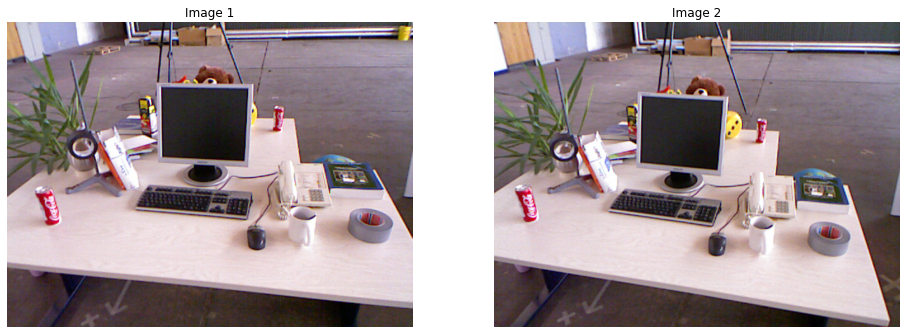

In [2]:
%matplotlib inline
import cv2
import numpy as np
from matplotlib import pyplot as plt
import time

img1 = cv2.imread("../img/1.png")
img2 = cv2.imread("../img/2.png")

plt.figure(num=1,figsize=(16,16))

# 创建第一个子图
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)) # 转换颜色通道，因为OpenCV使用BGR通道而Matplotlib使用RGB通道
plt.title("Image 1")
plt.axis('off') # 关闭坐标轴

# 创建第二个子图
plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)) # 转换颜色通道，因为OpenCV使用BGR通道而Matplotlib使用RGB通道
plt.title("Image 2")
plt.axis('off') # 关闭坐标轴

# plt.figure(figsize=(3000, 2000))

plt.show() # 显示图像

orb提取时间为:  1.9262471199035645


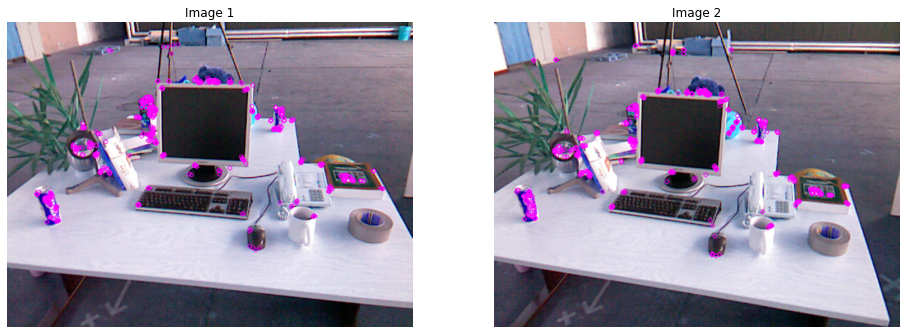

In [3]:
# 创建orb特征检测器，进行关键点提取和描述
a = time.time()
orb = cv2.ORB_create()
kp1_orb, des1_orb = orb.detectAndCompute(img1,None)
kp2_orb, des2_orb = orb.detectAndCompute(img2,None)
b=time.time()
print("orb提取时间为: ", b - a)
img1_kp_orb = np.zeros(img1.shape, img1.dtype)
img2_kp_orb = np.zeros(img2.shape, img2.dtype)
cv2.drawKeypoints(img1, kp1_orb, img1_kp_orb, color=(255,0,255))
cv2.drawKeypoints(img2, kp2_orb, img2_kp_orb, color=(255,0,255))

plt.figure(num=1,figsize=(16,16))

plt.subplot(1, 2, 1)
plt.imshow(img1_kp_orb) # 转换颜色通道，因为OpenCV使用BGR通道而Matplotlib使用RGB通道
plt.title("Image 1")
plt.axis('off') # 关闭坐标轴

plt.subplot(1, 2, 2)
plt.imshow(img2_kp_orb) # 转换颜色通道，因为OpenCV使用BGR通道而Matplotlib使用RGB通道
plt.title("Image 2")
plt.axis('off') # 关闭坐标轴

plt.show() # 显示图像

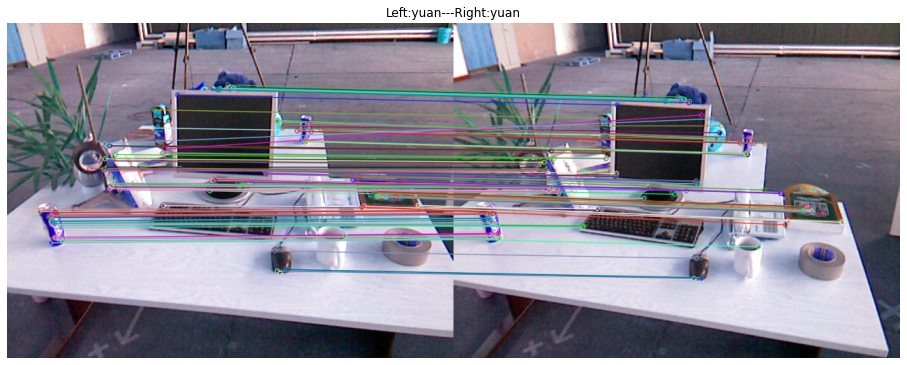

In [4]:
bf_orb = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck = True) # orb的normType应该使用NORM_HAMMING
matches_orb = bf_orb.match(des1_orb, des2_orb)
matches_orb = sorted(matches_orb, key=lambda x: x.distance)

min_distance_orb = matches_orb[0].distance
max_distance_orb = matches_orb[-1].distance

goodMatches_orb=[]
for i in matches_orb:
    if (i.distance < max(3 * min_distance_orb, 50)):  #以最小值的3倍和经验值50的max函数为阈值
            goodMatches_orb.append(i)

img_match_orb = cv2.drawMatches(img1, kp1_orb, img2, kp2_orb, goodMatches_orb, None, flags=2)
plt.figure(num=1,figsize=(16,16))
plt.imshow(img_match_orb)
plt.title('Left:yuan---Right:yuan')
plt.axis('off')
plt.show()

sift提取时间为:  1.7752976417541504


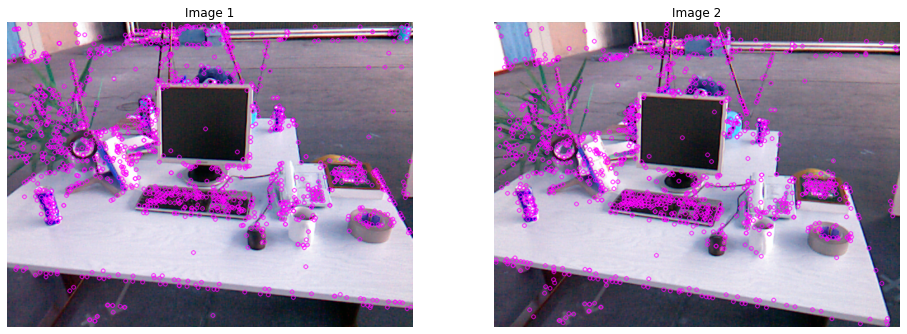

In [5]:
# 创建sift特征检测器，进行关键点提取和描述
a = time.time()
sift = cv2.xfeatures2d.SIFT_create()
kp1_sift, des1_sift = sift.detectAndCompute(img1,None)
kp2_sift, des2_sift = sift.detectAndCompute(img2,None)
b=time.time()
print("sift提取时间为: ", b - a)
img1_kp_sift = np.zeros(img1.shape, img1.dtype)
img2_kp_sift = np.zeros(img2.shape, img2.dtype)
cv2.drawKeypoints(img1, kp1_sift, img1_kp_sift, color=(255,0,255))
cv2.drawKeypoints(img2, kp2_sift, img2_kp_sift, color=(255,0,255))

plt.figure(num=1,figsize=(16,16))

plt.subplot(1, 2, 1)
plt.imshow(img1_kp_sift) # 转换颜色通道，因为OpenCV使用BGR通道而Matplotlib使用RGB通道
plt.title("Image 1")
plt.axis('off') # 关闭坐标轴

plt.subplot(1, 2, 2)
plt.imshow(img2_kp_sift) # 转换颜色通道，因为OpenCV使用BGR通道而Matplotlib使用RGB通道
plt.title("Image 2")
plt.axis('off') # 关闭坐标轴

plt.show() # 显示图像

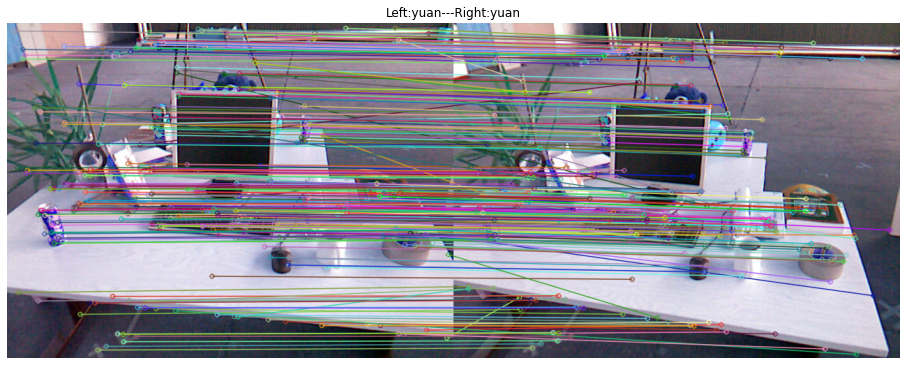

In [6]:
bf_sift = cv2.BFMatcher(cv2.NORM_L2, crossCheck = True) # sift的normType应该使用NORM_HAMMING
matches_sift = bf_sift.match(des1_sift, des2_sift)
matches_sift = sorted(matches_sift, key=lambda x: x.distance)

min_distance_sift = matches_sift[0].distance
max_distance_sift = matches_sift[-1].distance

goodMatches_sift=[]
for i in matches_sift:
    if (i.distance < max(5 * min_distance_sift, 150)):  #以最小值的5倍和经验值150的max函数为阈值
            goodMatches_sift.append(i)

img_match_sift = cv2.drawMatches(img1, kp1_sift, img2, kp2_sift, goodMatches_sift, None, flags=2)
plt.figure(num=1,figsize=(16,16))
plt.imshow(img_match_sift)
plt.title('Left:yuan---Right:yuan')
plt.axis('off')
plt.show()